<a href="https://colab.research.google.com/github/sphuang28/Tibaml_11103_AI/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# [[6, 8, 9](1st), [0, 1](2nd)]
# 這個可以直接帶, 但為了讓你方便, 把它處理的跟上次一樣
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [ ]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

horse


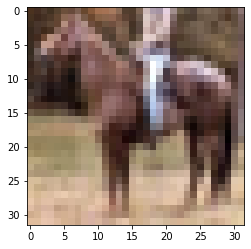

In [ ]:
import matplotlib.pyplot as plt
idx = 45000
print(trans[y_train[idx]])
plt.imshow(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

layers = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 4, 4, 256)       

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

layers = [
    # 1個filter(3 * 3 * 3) * 64(種) + 64(bias/threshold) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種) + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 4, 4, 256)       

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten

layers = [
    # 1個filter(3 * 3 * 3) * 64(種) + 64(bias/threshold) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種) + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")

]
model = Sequential(layers)
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 4, 4, 256)      

In [ ]:
# y: one-hot(浪費ram) -> 告訴他非0位置就好(Sparse)
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [ ]:
x_train_norm = x_train /255.0
x_test_norm = x_test / 255.0

In [ ]:
# batch_size: 我看多少筆, 把所有筆的斜率做一個平均, 再調整
# 圖片小(不吃那麼多ram):100-200 圖片大(吃很多ram):10-20
# 60000筆, 200比一次調整  -> 300次調整
# epochs: 整份資料看幾遍(你覺得模型訓練好就停下來)
# validation_split: 切出一部份資料來做模型確認
# epochs + validation: 什麼時候停下來(val_loss平滑的時候就停下來)
# epoch: 60000筆(90%) -> 54000 / 200 -> 270調整
# verbose: 決定log印多少 1(default):進度條 2:沒有進度條, 0:完全不印
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
225/225 - 5s - loss: 1.6383 - accuracy: 0.3946 - val_loss: 1.3317 - val_accuracy: 0.5162 - 5s/epoch - 22ms/step
Epoch 2/50
225/225 - 5s - loss: 1.2339 - accuracy: 0.5569 - val_loss: 1.1185 - val_accuracy: 0.5956 - 5s/epoch - 20ms/step
Epoch 3/50
225/225 - 4s - loss: 1.0184 - accuracy: 0.6404 - val_loss: 0.9326 - val_accuracy: 0.6710 - 4s/epoch - 20ms/step
Epoch 4/50
225/225 - 5s - loss: 0.8865 - accuracy: 0.6875 - val_loss: 0.8852 - val_accuracy: 0.6966 - 5s/epoch - 20ms/step
Epoch 5/50
225/225 - 5s - loss: 0.7848 - accuracy: 0.7255 - val_loss: 0.7759 - val_accuracy: 0.7356 - 5s/epoch - 20ms/step
Epoch 6/50
225/225 - 5s - loss: 0.7042 - accuracy: 0.7529 - val_loss: 0.7087 - val_accuracy: 0.7610 - 5s/epoch - 21ms/step
Epoch 7/50
225/225 - 4s - loss: 0.6239 - accuracy: 0.7818 - val_loss: 0.7348 - val_accuracy: 0.7558 - 4s/epoch - 20ms/step
Epoch 8/50
225/225 - 5s - loss: 0.5589 - accuracy: 0.8049 - val_loss: 0.6892 - val_accuracy: 0.7616 - 5s/epoch - 20ms/step
Epoch 9/50
225/2

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7127 - accuracy: 0.7647


[0.7126806378364563, 0.7646999955177307]

In [ ]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

313/313 [==============================] - 1s 3ms/step


array([3, 8, 8, ..., 5, 4, 7])

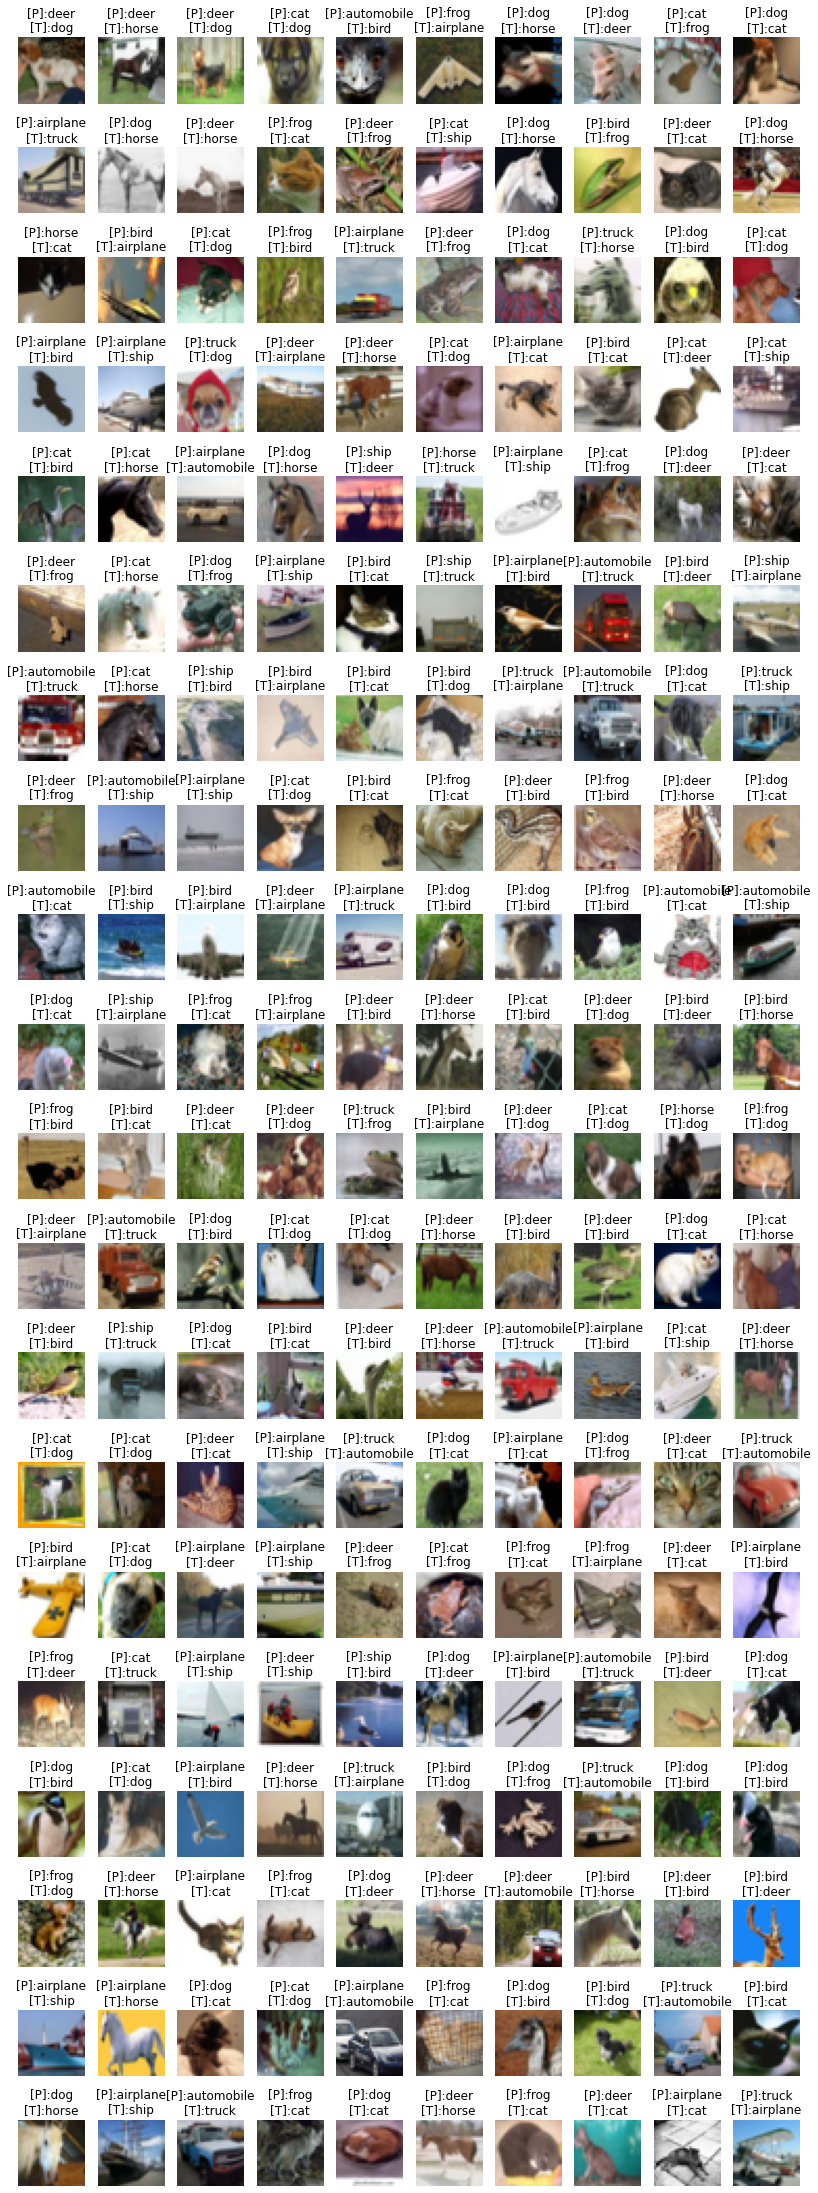

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
idx = idx[:200]
false_pre = pre[idx]
false_img = x_test[idx]
false_true = y_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[T]:{}".format(trans[false_pre[i]], 
                   trans[false_true[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

1/1 [==============================] - 0s 16ms/step
airplane 的機率: 0.9963
automobile 的機率: 0.0
bird 的機率: 0.003
cat 的機率: 0.0
deer 的機率: 0.0005
dog 的機率: 0.0
frog 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.0003
truck 的機率: 0.0
最高機率: airplane


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


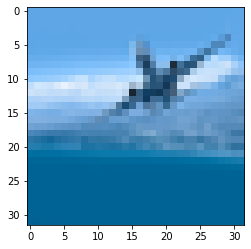

In [ ]:
import requests
from PIL import Image
url = "https://cw1.tw/CW/images/article/201708/article-598d1b33a34a9.jpg" #@param {type:"string"}
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw)
img = img.resize((32, 32)).convert("RGB")
# (32, 32, 3)X -> (1, 32, 32, 3)
img_np = np.array(img).reshape(1, 32, 32, 3) / 255.0
pre = model.predict(img_np)[0]
for t, p in zip(trans, pre):
    print(t, "的機率:", round(p, 4))
print("最高機率:", trans[pre.argmax()])
plt.imshow(img)

1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


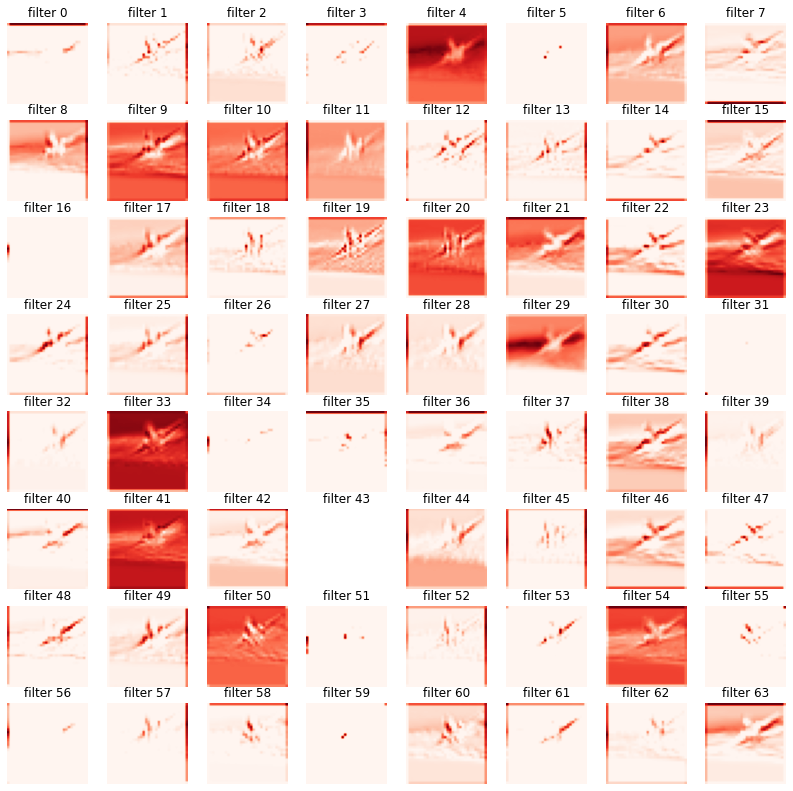

In [ ]:
# first layer
layers = [
    model.layers[0]
]
partial = Sequential(layers)
conv = partial.predict(img_np)[0]
plt.figure(figsize=(14, 14))
# 取出64種組合方式的某一個
for i in range(64):
    idx = i
    fil = conv[:,:,i]
    # 0~1
    ma, mi = fil.max(), fil.min()
    fil = (fil - mi) / (ma - mi)
    title = "filter {}".format(i)
    plt.subplot(8, 8, i+1)
    plt.title(title)
    plt.axis("off")
    plt.imshow(fil, cmap="Reds")

1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


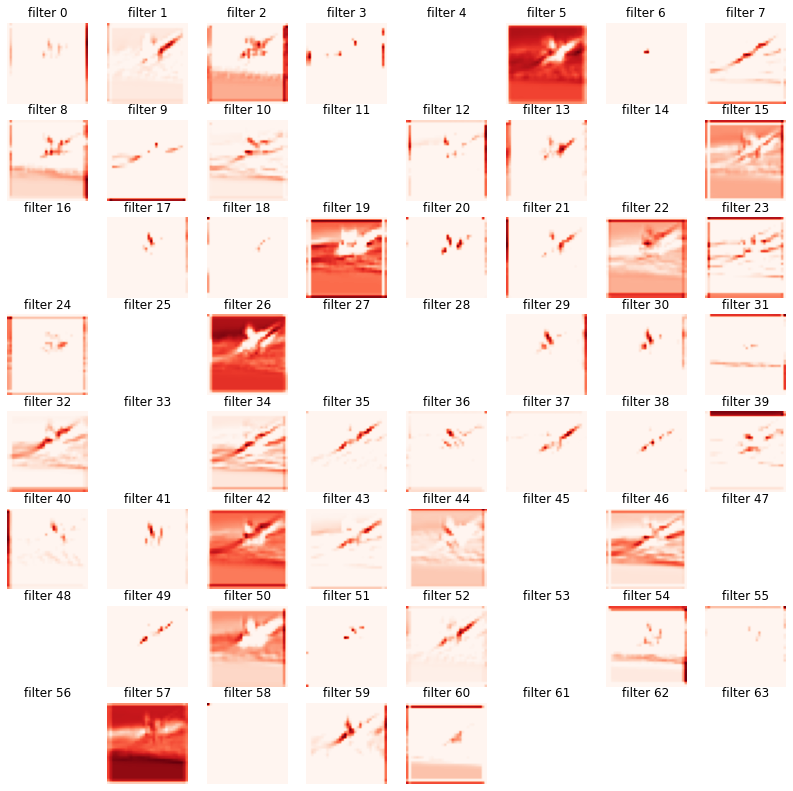

In [ ]:
# 128那層
layers = [
    model.layers[0],
    model.layers[2]
]
partial = Sequential(layers)
conv = partial.predict(img_np)[0]
plt.figure(figsize=(14, 14))
# 取出64種組合方式的某一個
for i in range(64):
    idx = i
    fil = conv[:,:,i]
    # 0~1
    ma, mi = fil.max(), fil.min()
    fil = (fil - mi) / (ma - mi)
    title = "filter {}".format(i)
    plt.subplot(8, 8, i+1)
    plt.title(title)
    plt.axis("off")
    plt.imshow(fil, cmap="Reds")

In [ ]:
# 看下模型到底長啥樣: hdfview
# 手動儲存: model.save("xxx.h5")
# 讀取模型: load_model 不用做的事: compile  可以做: 接續train, predict, evaluate
import os
from tensorflow.keras.models import load_model
if os.path.exists("cnn.h5"):
    load = load_model("cnn.h5")
# else:
    # load = Sequential
    # load.compile

In [ ]:
# 被蓋掉了, 我重新預測一下 
pre = model.predict(x_test_norm).argmax(axis=1)
pre

313/313 [==============================] - 1s 3ms/step


array([3, 8, 8, ..., 5, 4, 7])

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(t) for t in trans],
      index=["{}(真實)".format(t) for t in trans])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),853,13,42,5,25,7,6,6,22,21
automobile(真實),20,885,3,10,5,5,4,1,15,52
bird(真實),62,5,648,53,103,63,43,6,8,9
cat(真實),21,9,55,584,88,160,59,10,4,10
deer(真實),13,1,41,33,826,30,34,13,7,2
dog(真實),18,3,22,131,68,714,24,10,6,4
frog(真實),3,3,34,44,47,23,837,0,3,6
horse(真實),22,4,33,38,133,93,8,663,0,6
ship(真實),76,29,14,11,15,5,4,0,821,25
truck(真實),38,93,6,11,6,7,7,5,11,816
